In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV, cross_validate
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder, RobustScaler, StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA, KernelPCA, TruncatedSVD
import category_encoders as ce
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('Data/Cleaned_Data/book_user_explicit_rating_cleaned.csv',encoding='UTF-8')
df_book = pd.read_csv('Data/Cleaned_Data/book_cleaned.csv',encoding='UTF-8')
df_rating = pd.read_csv('Data/Cleaned_Data/rating_cleaned.csv',encoding='UTF-8')
df_user = pd.read_csv('Data/Cleaned_Data/user_cleaned.csv',encoding='UTF-8')

In [3]:
df = df.drop(columns=['index'])
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df_book = df_book.loc[:, ~df_book.columns.str.contains('^Unnamed')]
df_rating = df_rating.loc[:, ~df_rating.columns.str.contains('^Unnamed')]
df_user = df_user.loc[:, ~df_user.columns.str.contains('^Unnamed')]
df = df.drop(columns=['Image_URL','ISBN'])

In [4]:
new_df = df.copy()
new_df_2 = df.copy()

In [5]:
cat_cols = ['Book_Title','Book_Author','Publisher','Country']

In [6]:
labelenc = LabelEncoder()
binenc = ce.BinaryEncoder(cols=cat_cols)

In [7]:
def label_encoding(df,param):
    df[param] = labelenc.fit_transform(df[param].values)
    df[param] = df[param].astype('category')

In [8]:
label_encoding(new_df, 'User_ID')
label_encoding(new_df, 'Unique_ISBN')
label_encoding(new_df, 'Book_Title')
label_encoding(new_df, 'Book_Author')
label_encoding(new_df, 'Publisher')
label_encoding(new_df, 'Country')
label_encoding(new_df, 'Age_Range')

In [9]:
new_df = binenc.fit_transform(new_df)

In [10]:
scaler = RobustScaler()

In [11]:
new_df_scaled = scaler.fit_transform(new_df)

In [16]:
new_df_scaled_2 = new_df_scaled.copy()

In [17]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(new_df_scaled_2)

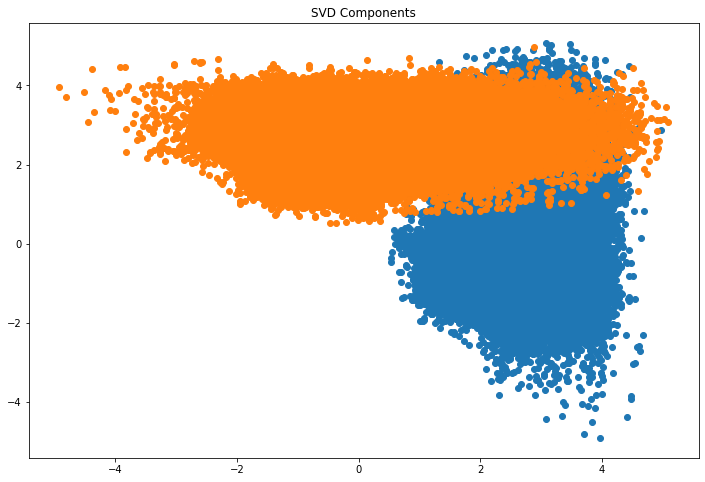

In [15]:
svd = TruncatedSVD(n_components=2, random_state=226).fit_transform(new_df_scaled)

plt.figure(figsize=(12,8))
plt.title('SVD Components')
plt.scatter(svd[:,0], svd[:,1])
plt.scatter(svd[:,1], svd[:,0])

Text(0, 0.5, 'SVD2')

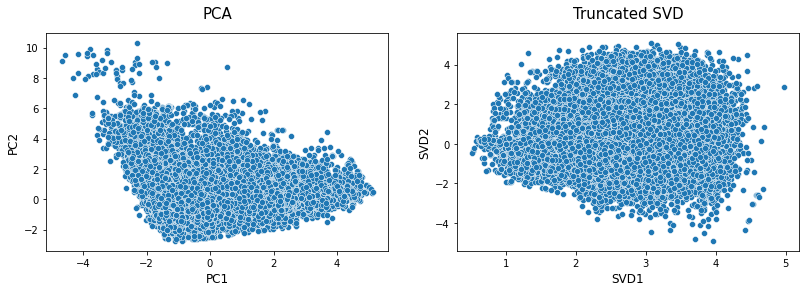

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(13.5 ,4))
sns.scatterplot(x=X_pca[:,0],y= X_pca[:,1], ax=ax[0])
sns.scatterplot(x=svd[:,0], y=svd[:,1], ax=ax[1])
ax[0].set_title("PCA", fontsize=15, pad=15)
ax[1].set_title("Truncated SVD", fontsize=15, pad=15)
ax[0].set_xlabel("PC1", fontsize=12)
ax[0].set_ylabel("PC2", fontsize=12)
ax[1].set_xlabel("SVD1", fontsize=12)
ax[1].set_ylabel("SVD2", fontsize=12)

In [ ]:
# kernel_pca = KernelPCA(
#     n_components=2, kernel='rbf', 
#                  gamma=15, random_state=42
# )

# df_kernel = kernel_pca.fit_transform(new_df_scaled)

: 

: 

# Paramter tuning..